##Hello Tensorflow

In [2]:
import tensorflow as tf

# Check TensorFlow version
print(tf.__version__)

# Create a simple tensor
tensor = tf.constant([[1, 2], [3, 4]])
print(tensor)
tensor_reshape = tf.reshape(tensor,[4,1])
print(tensor_reshape)


2.19.0
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1]
 [2]
 [3]
 [4]], shape=(4, 1), dtype=int32)


🧠 3. Binary Classification (Logic Gate - AND)

In [3]:
import tensorflow as tf
import numpy as np

# AND logic gate inputs and outputs
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [0], [0], [1]])

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, Y, epochs=100)

# Evaluate
print(model.predict(X))


Epoch 1/100


/home/kygiet/anaconda3/envs/MLapps/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step - accuracy: 0.5000 - loss: 0.7625
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.7622
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7620
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7617
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.7614
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7611
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.7608
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.7605
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7602
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7599
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7597
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.7594


####Import required libraries

In [5]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


###Load Titanic Data set

In [37]:
# Load training and evaluation data from TensorFlow's dataset storage
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')


###Separate Labels and hot encoded categorical columns 



In [38]:
# Extract the 'survived' column as the target label
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

# List of categorical columns in the dataset
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']

# Convert categorical columns to one-hot encoded format
dftrain = pd.get_dummies(dftrain, columns=CATEGORICAL_COLUMNS)
dfeval = pd.get_dummies(dfeval, columns=CATEGORICAL_COLUMNS)

# Ensure that both training and evaluation datasets have the same columns
# Missing columns in dfeval (after get_dummies) will be filled with 0
dfeval = dfeval.reindex(columns=dftrain.columns, fill_value=0)


###Normalize Numeric Features

In [29]:
# Use StandardScaler to normalize numeric values for better convergence during training
scaler = StandardScaler()
X_train = scaler.fit_transform(dftrain)
X_eval = scaler.transform(dfeval)


##Convert to tensorflow dataset

In [30]:
# Helper function to create TensorFlow dataset from numpy arrays
def make_tf_dataset(X, y, num_epochs=10, shuffle=True, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds

# Create training and evaluation datasets
train_ds = make_tf_dataset(X_train, y_train)
eval_ds = make_tf_dataset(X_eval, y_eval, num_epochs=1, shuffle=False)


# NN model and compilation and training

In [31]:
# Define a simple feedforward neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),   # Input layer matching feature count
    tf.keras.layers.Dense(16, activation='relu'),       # Hidden layer with ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')      # Output layer with sigmoid for binary classification
])

# Compile the model with appropriate loss function and optimizer
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model using the training dataset
model.fit(
    train_ds,
    epochs=10,
    steps_per_epoch=len(X_train) // 32  # Required for datasets with repeating epochs
)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6560 - loss: 0.6794   
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.6244
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 0.5880
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7642 - loss: 0.5116
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7456 - loss: 0.5401
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8096 - loss: 0.4450
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7681 - loss: 0.5047
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8130 - loss: 0.4506
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4599
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.4419


##Evaluate performance

In [32]:
# Evaluate the model on the evaluation dataset
loss, accuracy = model.evaluate(eval_ds)
print("Accuracy:", accuracy)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7713 - loss: 0.4867  
Accuracy: 0.7803030014038086


In [33]:
##Get predicted probabilities
# Get predicted probabilities
pred_probs = model.predict(eval_ds)

# Convert probabilities to binary classes
pred_classes = (pred_probs > 0.5).astype("int32")

# Now you can analyze or print:
for i in range(5):
    print(f"Passenger {i+1}: Probability of survival = {pred_probs[i][0]:.4f}, Predicted class = {pred_classes[i][0]}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Passenger 1: Probability of survival = 0.0960, Predicted class = 0
Passenger 2: Probability of survival = 0.5059, Predicted class = 1
Passenger 3: Probability of survival = 0.8089, Predicted class = 1
Passenger 4: Probability of survival = 0.6916, Predicted class = 1
Passenger 5: Probability of survival = 0.2701, Predicted class = 0


<Axes: >

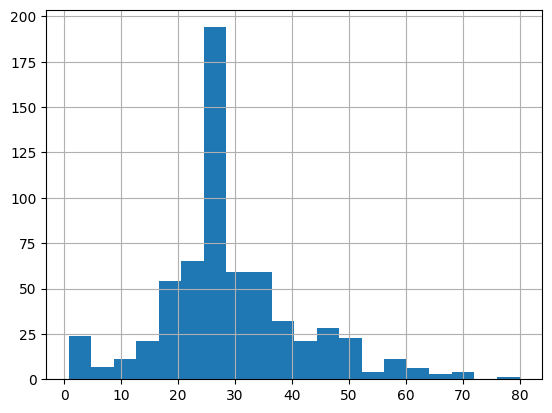

In [34]:
import matplotlib
dftrain.age.hist(bins=20)

In [39]:
dftrain.sex.value_counts().plot(kind="barh")

AttributeError: 'DataFrame' object has no attribute 'sex'

In [40]:
dftrain['class'].value_counts().plot(kind="barh")

KeyError: 'class'

In [24]:
pd.concat([dftrain,y_train], axis=1 ).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

KeyError: 'sex'

In [25]:
dfeval.shape

(264, 34)